#  Is it possible to create clusters of the Boston Airbnb’s?

In [1]:
# libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
# import dataset
data = pd.read_csv('data/Boston/data_clean.csv')
print(data.shape)
data.head()

(3405, 116)


,ppa,bathrooms,bedrooms,beds,host_since,host_response_rate,host_acceptance_rate,number_of_reviews,reviews_per_month,review_scores_accuracy,...,cancellation_policy_strict,cancellation_policy_super_strict_30,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t
0,62.50,1.5,2.0,3.0,511,100.0,94.0,0,1.17,10.0,...,0,0,0,0,0,1,1,0,1,0
1,32.50,1.0,1.0,1.0,1553,100.0,100.0,36,1.30,10.0,...,0,0,0,0,0,1,1,0,0,1
2,32.50,1.0,1.0,1.0,2676,100.0,88.0,41,0.47,10.0,...,0,0,0,0,1,0,0,1,0,1
3,18.75,1.0,1.0,2.0,1235,100.0,50.0,1,1.00,10.0,...,0,0,0,0,1,0,1,0,1,0
4,39.50,1.5,1.0,2.0,850,100.0,100.0,29,2.25,10.0,...,0,0,0,0,0,1,0,1,0,1


In [3]:
num_cols = data.columns[0:15]
num_cols

Index(['ppa', 'bathrooms', 'bedrooms', 'beds', 'host_since',
       'host_response_rate', 'host_acceptance_rate', 'number_of_reviews',
       'reviews_per_month', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

In [4]:
# normalize numerical variables
scaler = preprocessing.MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
data.head()

,ppa,bathrooms,bedrooms,beds,host_since,host_response_rate,host_acceptance_rate,number_of_reviews,reviews_per_month,review_scores_accuracy,...,cancellation_policy_strict,cancellation_policy_super_strict_30,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t
0,0.042063,0.250000,0.4,0.1875,0.178571,1.0,0.94,0.000000,0.060606,1.0,...,0,0,0,0,0,1,1,0,1,0
1,0.020117,0.166667,0.2,0.0625,0.543417,1.0,1.00,0.089109,0.067398,1.0,...,0,0,0,0,0,1,1,0,0,1
2,0.020117,0.166667,0.2,0.0625,0.936625,1.0,0.88,0.101485,0.024033,1.0,...,0,0,0,0,1,0,0,1,0,1
3,0.010059,0.166667,0.2,0.1250,0.432073,1.0,0.50,0.002475,0.051724,1.0,...,0,0,0,0,1,0,1,0,1,0
4,0.025238,0.250000,0.2,0.1250,0.297269,1.0,1.00,0.071782,0.117032,1.0,...,0,0,0,0,0,1,0,1,0,1


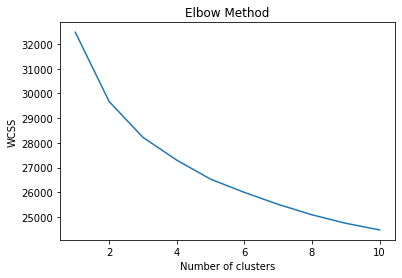

In [5]:
# find the optimum number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=333)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('figures/5_num_clusters.png')
plt.show()

In [6]:
# set the model with the optimum number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=333)
# fit and predict
pred_y = kmeans.fit_predict(data)
# add result to our df
data.insert(0, "cluster",pred_y, True)
data.head()

,cluster,ppa,bathrooms,bedrooms,beds,host_since,host_response_rate,host_acceptance_rate,number_of_reviews,reviews_per_month,...,cancellation_policy_strict,cancellation_policy_super_strict_30,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t
0,1,0.042063,0.250000,0.4,0.1875,0.178571,1.0,0.94,0.000000,0.060606,...,0,0,0,0,0,1,1,0,1,0
1,1,0.020117,0.166667,0.2,0.0625,0.543417,1.0,1.00,0.089109,0.067398,...,0,0,0,0,0,1,1,0,0,1
2,1,0.020117,0.166667,0.2,0.0625,0.936625,1.0,0.88,0.101485,0.024033,...,0,0,0,0,1,0,0,1,0,1
3,1,0.010059,0.166667,0.2,0.1250,0.432073,1.0,0.50,0.002475,0.051724,...,0,0,0,0,1,0,1,0,1,0
4,1,0.025238,0.250000,0.2,0.1250,0.297269,1.0,1.00,0.071782,0.117032,...,0,0,0,0,0,1,0,1,0,1


In [7]:
# number of data point in each cluster
data.groupby('cluster').count()['ppa']

cluster
0    1297
1    1163
2     945
Name: ppa, dtype: int64

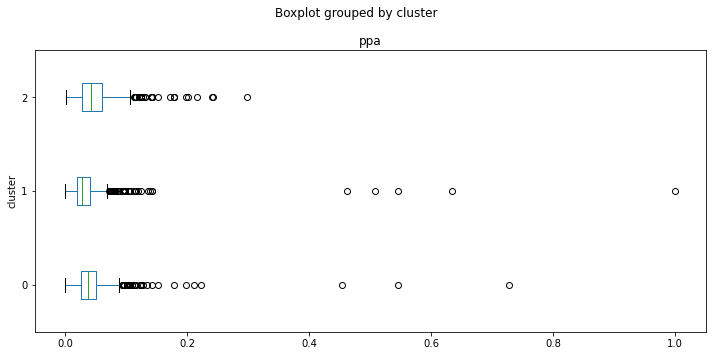

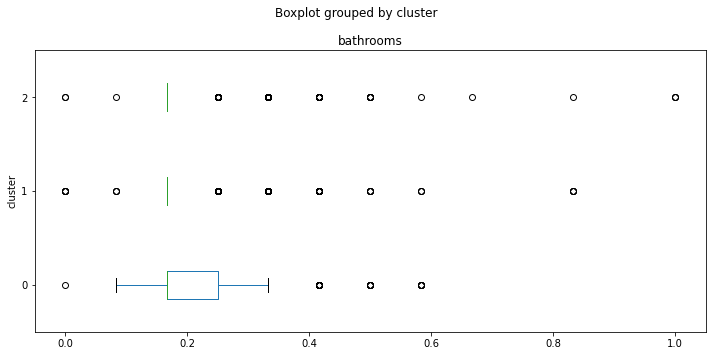

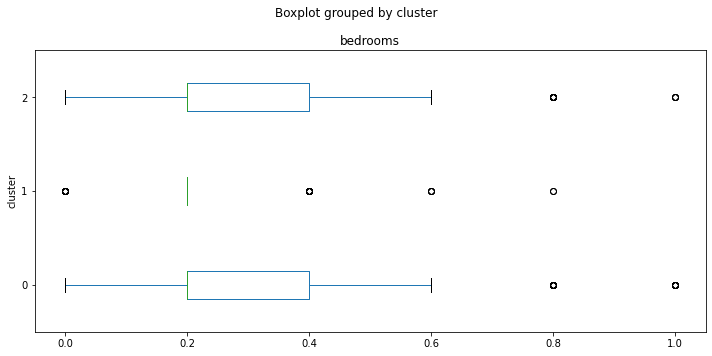

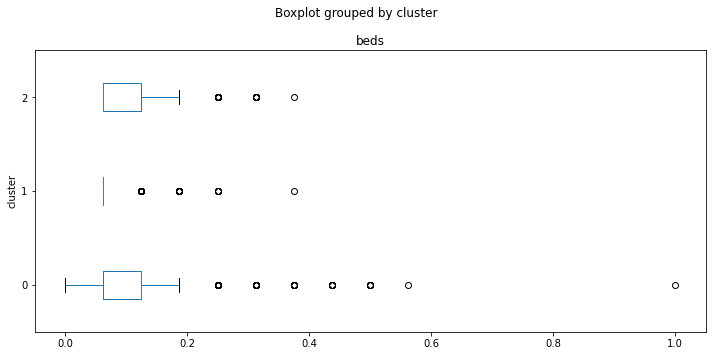

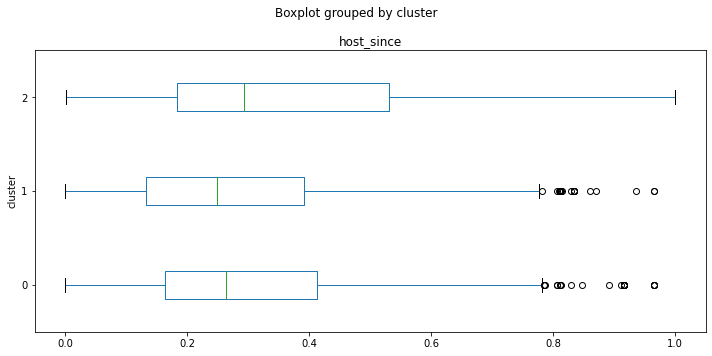

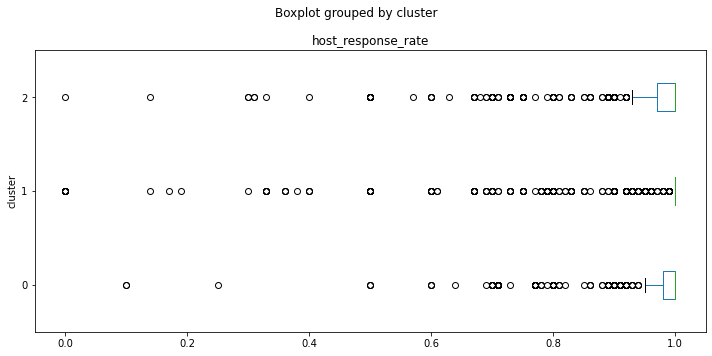

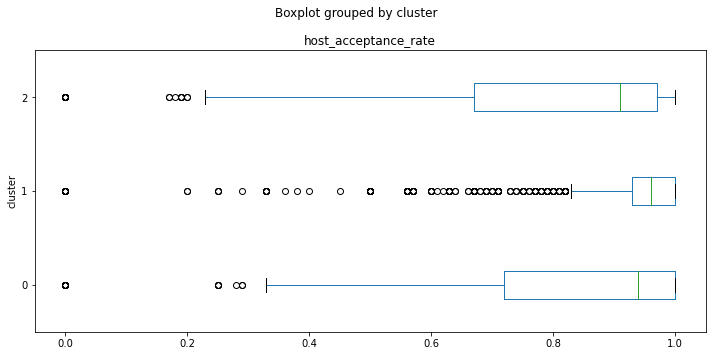

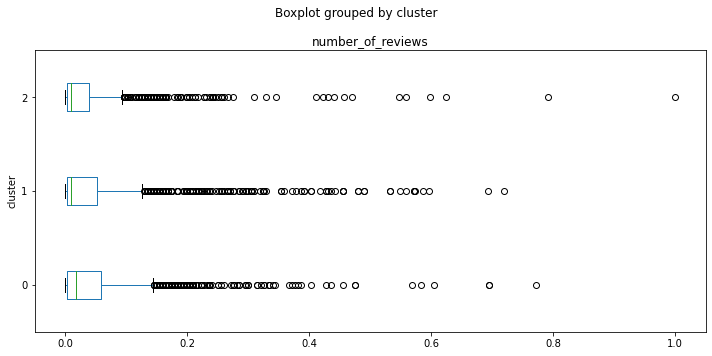

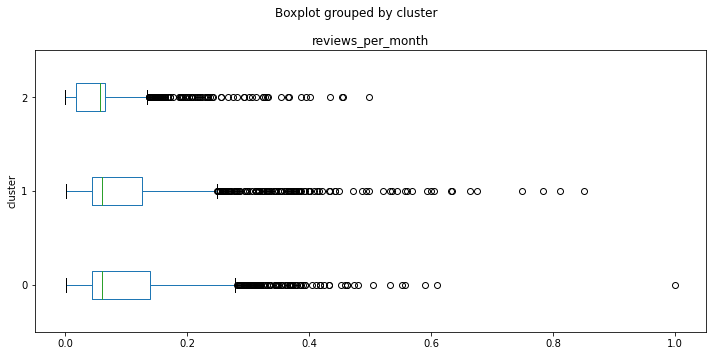

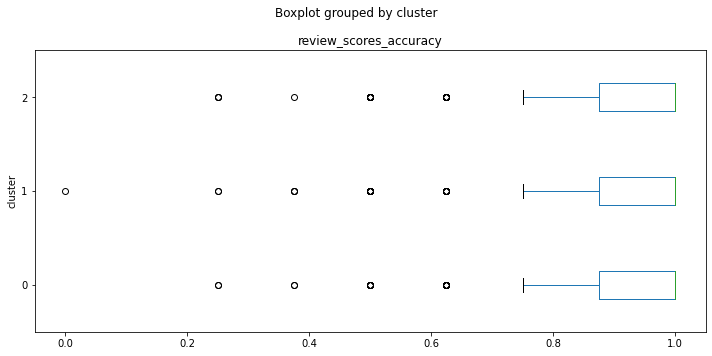

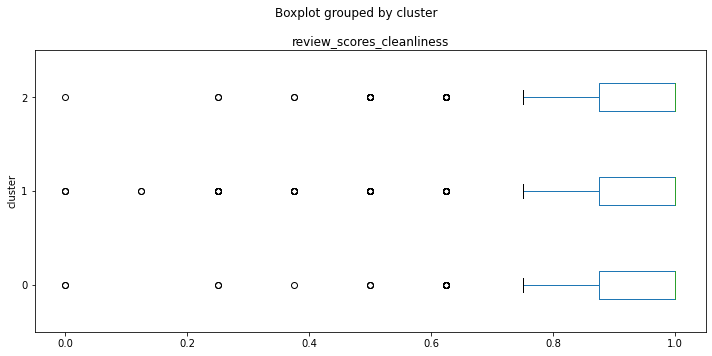

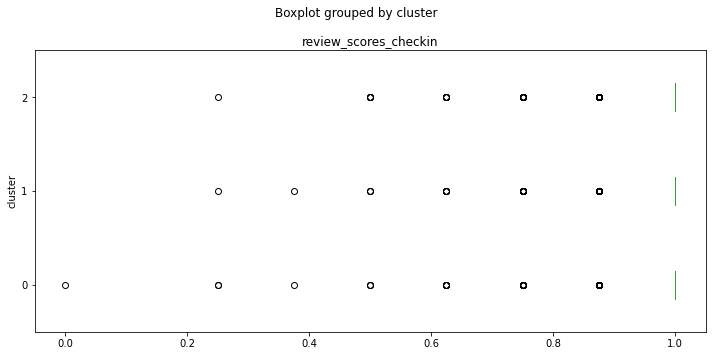

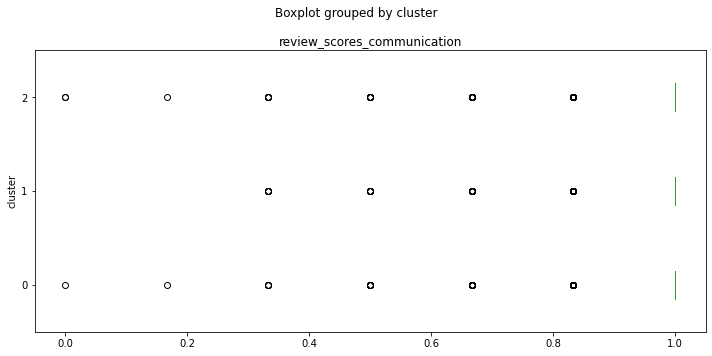

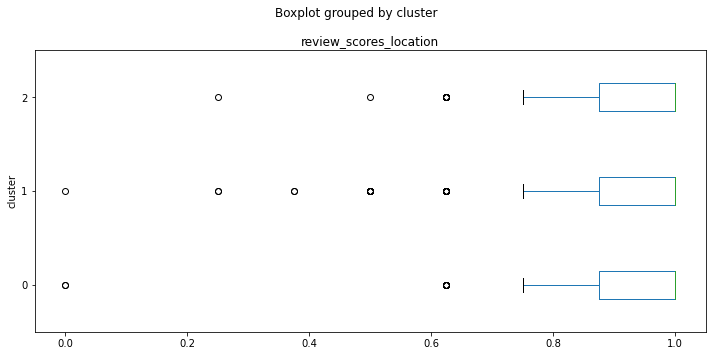

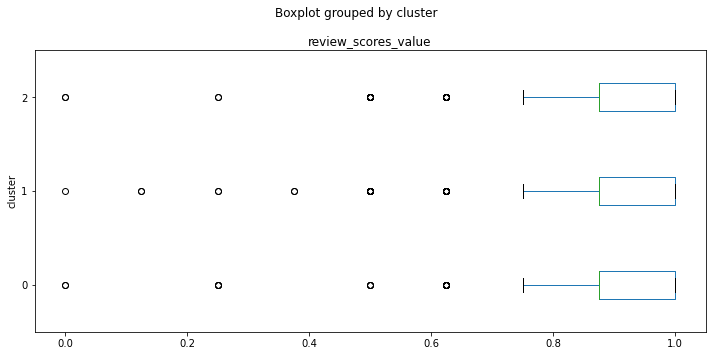

In [8]:
# analysis of continuous variables
num_var = data.columns[1:16]
for var in num_var:
    data.boxplot(column = var, by ='cluster', grid=False, vert=False, figsize = (10,5))
    plt.ylabel('cluster')
    plt.xlabel('')
    plt.tight_layout()
    plt.savefig('figures/5_boxplot_'+var+'.png')

In [9]:
# analysis categorical variables (more than 2 categories)
neigh = []
prop = [] 
room = []
bed = []
cancel = []
response = []
for col in data.columns[59:117]:
    if col[0:5] == 'neigh':
        neigh.append(col)
    elif col[0:4] == 'prop':
        prop.append(col)
    elif col[0:4] == 'room':
        room.append(col)
    elif col[0:3] == 'bed':
        bed.append(col)
    elif col[0:6] == 'cancel':
        cancel.append(col)
    elif col[5:13] == 'response':
        response.append(col)

In [10]:
def reverse_dummies(var, name):
    c = data[['cluster'] + var]
    c.set_index('cluster',inplace=True)
    c = c[c==1].stack().reset_index().drop(0,1)
    c.columns = ['cluster', name]
    c[name] = c[name].str.replace(name+'_', '')
    return c

def prepare_dataset(name, df):
    gb = df.groupby([name, 'cluster']).agg({'cluster':['count']})/data.shape[0]
    gb.reset_index(level=0, inplace=True)
    gb.reset_index(level=0, inplace=True)
    gb.columns = ['cluster', name, 'score']
    return gb

def plot_scores(name, df, size):
    plt.figure(figsize = size)
    x = df[name]
    y = df['score']
    classes = ['c0', 'c1', 'c2']
    values = df['cluster']
    colours = ListedColormap(['r','b','g'])
    scatter = plt.scatter(x, y,c=values, cmap=colours)
    plt.xticks(rotation=90)
    plt.legend(handles=scatter.legend_elements()[0], labels=classes)
    plt.grid()
    plt.title(name + ' score by cluster')
    plt.ylabel('score')
    plt.savefig('figures/5_scatter_scores_'+name+'.png')
    plt.show()

In [11]:
n = reverse_dummies(neigh, 'neighbourhood')
n = prepare_dataset('neighbourhood', n)
n.head()

,cluster,neighbourhood,score
0,0,Allston,0.019677
1,1,Allston,0.039354
2,2,Allston,0.013216
3,0,Back Bay,0.045228
4,1,Back Bay,0.008223


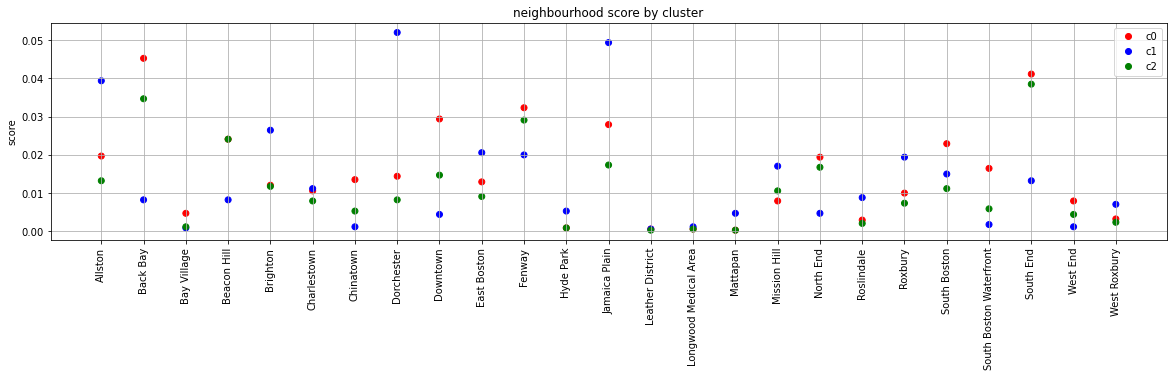

In [12]:
plot_scores('neighbourhood', n, (20,4))

In [13]:
def reverse_prepare_plot(var, name, s):
    n = reverse_dummies(var, name)
    n = prepare_dataset(name, n)
    plot_scores(name, n, s)

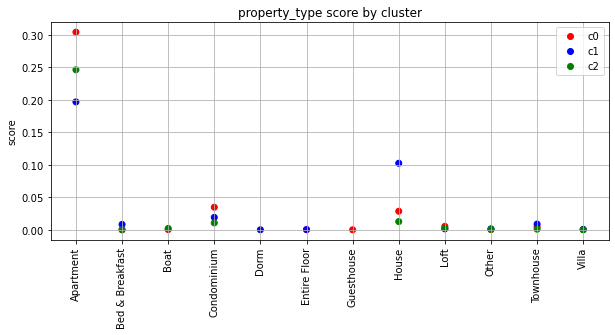

In [14]:
reverse_prepare_plot(prop, 'property_type', (10,4))

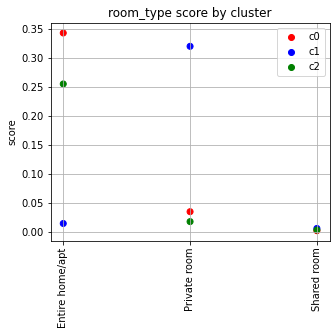

In [15]:
reverse_prepare_plot(room, 'room_type', (5,4))

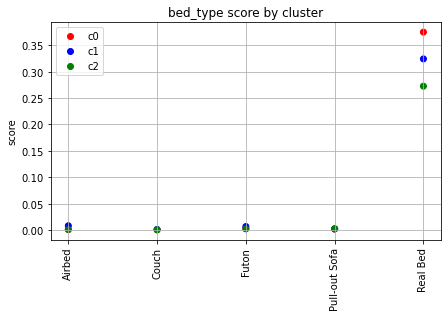

In [16]:
reverse_prepare_plot(bed, 'bed_type', (7,4))

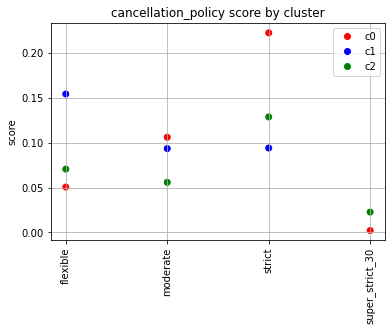

In [17]:
reverse_prepare_plot(cancel, 'cancellation_policy', (6,4))

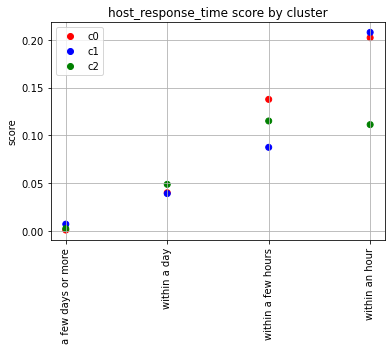

In [18]:
reverse_prepare_plot(response, 'host_response_time', (6,4))

In [19]:
binary = ['cluster'] + list(data.columns[16:59]) + ['host_is_superhost_t', 'host_identity_verified_t']
binary = data[binary]

In [20]:
g = binary.groupby('cluster').sum()/data.shape[0]
g.reset_index(inplace=True)
g.head()

,cluster,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,...,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,host_is_superhost_t,host_identity_verified_t
0,0,0.272247,0.350367,0.023789,0.121292,0.257562,0.310132,0.007636,0.015565,0.043465,...,0.339501,0.004112,0.016153,0.347724,0.283407,0.000000,0.021733,0.378561,0.056681,0.301322
1,1,0.059325,0.208811,0.046402,0.044934,0.074596,0.241410,0.024082,0.026725,0.002937,...,0.281938,0.012628,0.009985,0.154185,0.213803,0.000000,0.004699,0.323935,0.038473,0.230250
2,2,0.020852,0.237298,0.010279,0.070778,0.167107,0.135683,0.006461,0.013510,0.028194,...,0.196182,0.003524,0.007636,0.235536,0.200881,0.000587,0.013510,0.258443,0.012041,0.200881


In [21]:
g = binary.groupby('cluster').sum()/data.shape[0]
g.reset_index(inplace=True)
g = binary.groupby('cluster').sum()/data.shape[0]
g.reset_index(inplace=True)
g = g.T
g = g.iloc[1:]
g.columns = ['c0','c1', 'c2']
g.head()

,c0,c1,c2
24-Hour Check-in,0.272247,0.059325,0.020852
Air Conditioning,0.350367,0.208811,0.237298
Breakfast,0.023789,0.046402,0.010279
Buzzer/Wireless Intercom,0.121292,0.044934,0.070778
Cable TV,0.257562,0.074596,0.167107


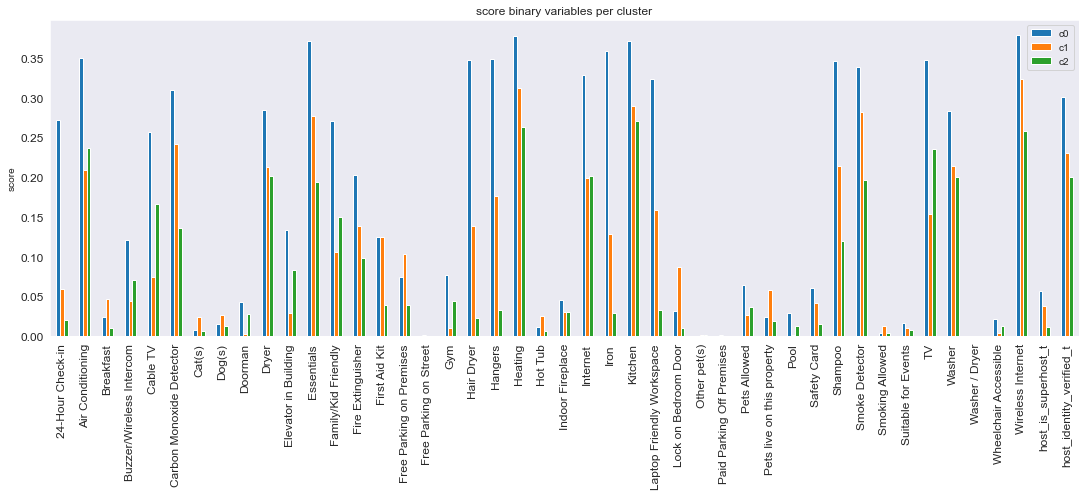

In [22]:
sns.set_style("dark")
g.plot(kind='bar', figsize=(15,7), title = 'score binary variables per cluster', fontsize=12, stacked=False)
plt.tight_layout()
plt.ylabel('score')
plt.show()

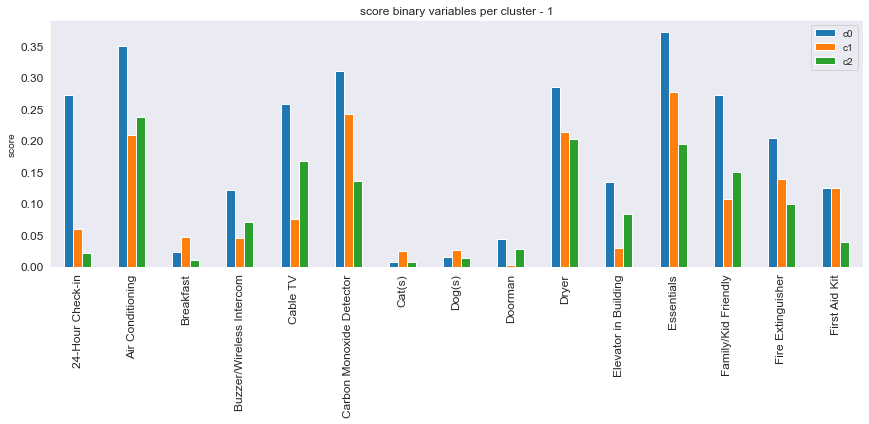

In [23]:
g[0:15].plot(kind='bar', figsize=(12,6), title = 'score binary variables per cluster - 1', fontsize=12, stacked=False)
plt.tight_layout()
plt.ylabel('score')
plt.savefig('figures/5_score_binary_1.png')
plt.show()

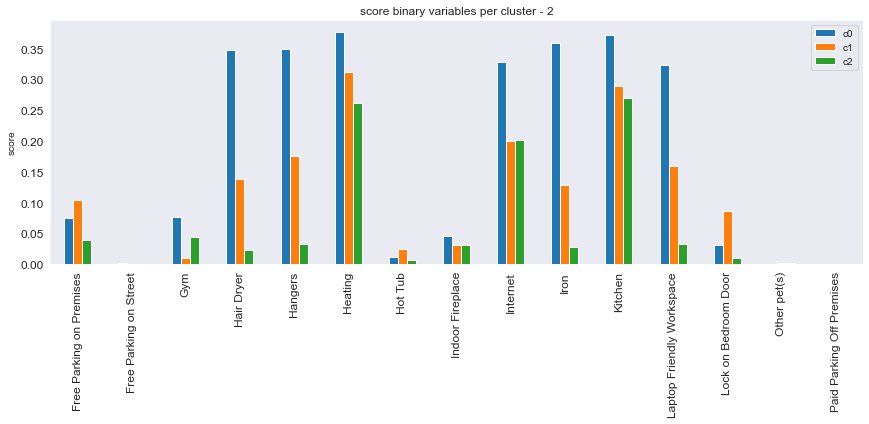

In [24]:
g[15:30].plot(kind='bar', figsize=(12,6), title = 'score binary variables per cluster - 2', fontsize=12, stacked=False)
plt.tight_layout()
plt.ylabel('score')
plt.savefig('figures/5_score_binary_2.png')
plt.show()

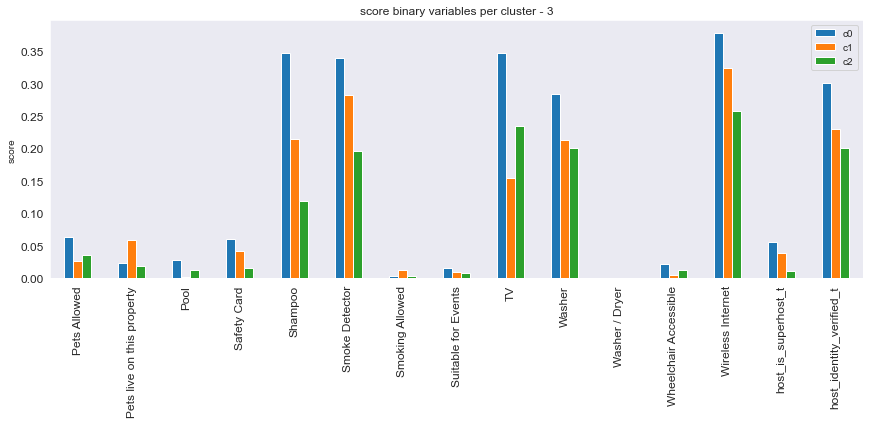

In [25]:
g[30::].plot(kind='bar', figsize=(12,6), title = 'score binary variables per cluster - 3', fontsize=12, stacked=False)
plt.tight_layout()
plt.ylabel('score')
plt.savefig('figures/5_score_binary_3.png')
plt.show()